In [2]:
!pip install opencv-python

  Using cached opencv_python-4.3.0.36-cp35-cp35m-manylinux2014_x86_64.whl (43.7 MB)


In [ ]:
!sudo apt-get install libsm6 libxrender1 libfontconfig1

In [1]:
import pandas as pd
import numpy as np
import cv2

import matplotlib.pyplot as plt
% matplotlib inline

/home/srijonsarkar41/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/srijonsarkar41/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
! git clone https://github.com/srijonsarkar/Movie-Genre-Prediction

fatal: destination path 'Movie-Genre-Prediction' already exists and is not an empty directory.


In [3]:
df = pd.read_csv('Movie-Genre-Prediction/movies_metadata_modded.csv')
df.head(10)

,genres,id,imdb_id,original_language,release_date
0,"[{'id': 99, 'name': 'Documentary'}]",315946,tt3155794,xx,1874-12-09
1,"[{'id': 99, 'name': 'Documentary'}]",194079,tt2221420,en,1878-06-14
2,"[{'id': 99, 'name': 'Documentary'}]",426903,tt5459794,en,1883-11-19
3,"[{'id': 99, 'name': 'Documentary'}]",159897,tt2075247,xx,1887-08-18
4,"[{'id': 99, 'name': 'Documentary'}]",96882,tt1758563,xx,1888-01-01
5,"[{'id': 99, 'name': 'Documentary'}]",16464,tt0343112,xx,1888-10-15
6,"[{'id': 99, 'name': 'Documentary'}]",33316,tt1202028,xx,1890-01-01
7,[],386743,tt5285442,en,1890-03-09
8,"[{'id': 35, 'name': 'Comedy'}]",32571,tt0361921,en,1890-11-21
9,[],33315,tt0416046,xx,1890-11-21


In [4]:
# keeping only english movies in dataset
df = df[df.original_language=='en'].copy()
df.shape

(32111, 5)

In [5]:
# have to remove movies released before 1990s
df.release_date = df.release_date.astype('str')

df.release_date = df.release_date.apply(lambda x : x[:4])

In [6]:
df.release_date = df.release_date.astype('int16')
df2 = df[df.release_date >= 1990].copy()
df2.head(20)

,genres,id,imdb_id,original_language,release_date
15648,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",44281,tt0090665,en,1990
15649,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",41927,tt0100822,en,1990
15650,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",8996,tt0099776,en,1990
15651,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",57476,tt0100670,en,1990
15652,"[{'id': 99, 'name': 'Documentary'}]",37447,tt0099121,en,1990
15653,"[{'id': 10749, 'name': 'Romance'}, {'id': 53, ...",41925,tt0099292,en,1990
15655,"[{'id': 27, 'name': 'Horror'}]",67515,tt0100079,en,1990
15658,"[{'id': 10402, 'name': 'Music'}]",44257,tt0099844,en,1990
15659,[],40959,tt0243199,en,1990
15661,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",13293,tt0099260,en,1990


In [7]:
df.dropna(inplace=True)
df.shape

(32101, 5)

In [8]:
df2.head(10)

,genres,id,imdb_id,original_language,release_date
15648,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",44281,tt0090665,en,1990
15649,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",41927,tt0100822,en,1990
15650,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",8996,tt0099776,en,1990
15651,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",57476,tt0100670,en,1990
15652,"[{'id': 99, 'name': 'Documentary'}]",37447,tt0099121,en,1990
15653,"[{'id': 10749, 'name': 'Romance'}, {'id': 53, ...",41925,tt0099292,en,1990
15655,"[{'id': 27, 'name': 'Horror'}]",67515,tt0100079,en,1990
15658,"[{'id': 10402, 'name': 'Music'}]",44257,tt0099844,en,1990
15659,[],40959,tt0243199,en,1990
15661,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",13293,tt0099260,en,1990


In [9]:
df2.reset_index(inplace=True)
df2.head()

,index,genres,id,imdb_id,original_language,release_date
0,15648,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",44281,tt0090665,en,1990
1,15649,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",41927,tt0100822,en,1990
2,15650,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",8996,tt0099776,en,1990
3,15651,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",57476,tt0100670,en,1990
4,15652,"[{'id': 99, 'name': 'Documentary'}]",37447,tt0099121,en,1990


In [10]:
df2.drop('index', axis=1, inplace=True)
df2.head()

,genres,id,imdb_id,original_language,release_date
0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",44281,tt0090665,en,1990
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",41927,tt0100822,en,1990
2,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",8996,tt0099776,en,1990
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",57476,tt0100670,en,1990
4,"[{'id': 99, 'name': 'Documentary'}]",37447,tt0099121,en,1990


In [11]:
# remove duplicate rows from df2

df2.drop_duplicates('imdb_id', inplace=True)
df2.shape

(20896, 5)

In [12]:
df2.reset_index(inplace=True)

In [13]:
df2.drop('index',axis=1,inplace=True)
df2.head()

,genres,id,imdb_id,original_language,release_date
0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",44281,tt0090665,en,1990
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",41927,tt0100822,en,1990
2,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",8996,tt0099776,en,1990
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",57476,tt0100670,en,1990
4,"[{'id': 99, 'name': 'Documentary'}]",37447,tt0099121,en,1990


In [14]:
# now we have only english movies released after 1990 in our dataset df2
# need to remove movies which don't have any genres specified

l=[]
for i in range(len(df2)):
    if len(eval(df2.iloc[i,0]))==0:
        l.append(i)
        
print(len(l))
  

1050


In [15]:
# need to drop these 1050 rows

df2.drop(l, inplace=True)
df2.shape

(19846, 5)

In [16]:
df2.reset_index(inplace=True)
df2.drop('index',axis=1,inplace=True)
df2.head()

,genres,id,imdb_id,original_language,release_date
0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",44281,tt0090665,en,1990
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",41927,tt0100822,en,1990
2,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",8996,tt0099776,en,1990
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",57476,tt0100670,en,1990
4,"[{'id': 99, 'name': 'Documentary'}]",37447,tt0099121,en,1990


In [17]:
# shows how many movies in each genre

dict_g = {}
for i in range(len(df2)):
    genres = eval(df2.iloc[i,0])
    
    for genre in genres:
        if genre['name'] not in dict_g.keys():
            dict_g[str(genre['name'])] = 1
        else:
            dict_g[str(genre['name'])] += 1

In [18]:
dict_g

{'Action': 3050,
 'Adventure': 1602,
 'Animation': 918,
 'Comedy': 6067,
 'Crime': 1783,
 'Documentary': 2969,
 'Drama': 8280,
 'Family': 1669,
 'Fantasy': 1064,
 'Foreign': 541,
 'History': 526,
 'Horror': 2458,
 'Music': 718,
 'Mystery': 1128,
 'Romance': 2830,
 'Science Fiction': 1627,
 'TV Movie': 579,
 'Thriller': 4316,
 'War': 335,
 'Western': 188}

ValueError: could not convert string to float: 'Romance'

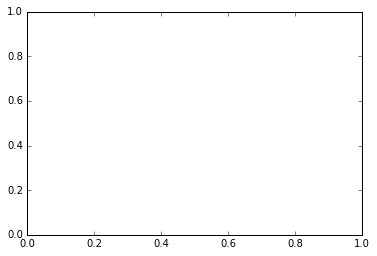

In [19]:
plt.bar( dict_g.keys(), dict_g.values(), width=1)
plt.figure(figsize=(40,12))

In [20]:
df2.head(20)

,genres,id,imdb_id,original_language,release_date
0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",44281,tt0090665,en,1990
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",41927,tt0100822,en,1990
2,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",8996,tt0099776,en,1990
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",57476,tt0100670,en,1990
4,"[{'id': 99, 'name': 'Documentary'}]",37447,tt0099121,en,1990
5,"[{'id': 10749, 'name': 'Romance'}, {'id': 53, ...",41925,tt0099292,en,1990
6,"[{'id': 27, 'name': 'Horror'}]",67515,tt0100079,en,1990
7,"[{'id': 10402, 'name': 'Music'}]",44257,tt0099844,en,1990
8,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",13293,tt0099260,en,1990
9,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",41810,tt0099017,en,1990


In [21]:
df2.shape

(19846, 5)

In [22]:
genres_dict = {     
     12: "Adventure",
     14: "Fantasy",
     16: "Animation",
     18: "Drama",
     27: "Horror", 
     28: "Action",
     35: "Comedy",
     36: "History", 
     37: "Western",     
     53: "Thriller",
     80: "Crime",  
     99: "Documentary",
     878: "Science Fiction", 
     9648: "Mystery",    
     10402: "Music",     
     10749: "Romance",     
     10751: "Family",    
     10752: "War",     
     10769: "Foreign", 
     10770: "TV Movie", }

In [23]:
# need to extract labels(genres) of each poster now and insert into Ydata
# and also process each poster into numpy arrays and insert into Xdata

import os

dir = './Movie-Genre-Prediction/en_90/'
dir2= './Movie-Genre-Prediction/images/'

labels = []

x_data = []
y_data = []

poster_shape = (268,182,3)

for i,row in df2.iterrows():
  
  row_genre = { genre['id'] for genre in eval(row['genres']) if genre['id'] in genres_dict }
  image_loc = dir + str(row['imdb_id']) + '.jpg'
  image_loc2= dir2 + str(row['imdb_id']) + '.jpg'
  
  if os.path.exists(image_loc):
    
    poster = cv2.imread(image_loc)
    if poster.shape == poster_shape:
      x_data.append(poster)
      y_data.append(row_genre)
  
  elif os.path.exists(image_loc2):
    
    poster = cv2.imread(image_loc2)
    if poster.shape == poster_shape:
      x_data.append(poster)
      y_data.append(row_genre)
  

In [24]:
len(x_data)

18938

In [25]:
!pip install scikit-multilearn

     |████████████████████████████████| 89 kB 2.8 MB/s 


In [26]:
from sklearn.preprocessing import MultiLabelBinarizer 
from skmultilearn.model_selection import iterative_train_test_split
import cv2
genre_list = list(genres_dict.keys())

mlb = MultiLabelBinarizer(classes=genre_list)
Y_data = mlb.fit_transform(y_data)

X_data = np.array(x_data)
X_data = np.array(list(map(lambda x: cv2.resize(x, (224,224), interpolation=cv2.INTER_AREA), X_data)))

In [27]:
X_train, Y_train, X_test, Y_test = iterative_train_test_split(X_data, Y_data, test_size = 0.33)
del X_data
del Y_data
del x_data
del df2

In [28]:
print(len(X_train))
print(len(X_test))

12619
6319


In [31]:
import tensorflow
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras import Model

model1 = VGG19(weights='imagenet', include_top=False)
model1.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Concatenate, Flatten, Dense, Reshape

input1 = tf.keras.Input(shape = (224,224,3))    # movie poster

layer = Conv2D( filters=32, kernel_size=7, strides=2, padding="same", use_bias=True, input_shape=poster_shape, activation='relu')(input1)
#layer = MaxPooling2D( pool_size=2, strides=2 )(layer)

layer = Conv2D( filters=32, kernel_size=5, strides=2, padding="same", use_bias=True, activation='relu')(layer)     
#layer = MaxPooling2D(pool_size=2, strides=1)(layer)
layer = Dropout(0.3)(layer)
    
layer = Conv2D( filters=64, kernel_size=5, strides=1, padding="same", use_bias=True, activation='relu')(layer)
layer = MaxPooling2D(pool_size=2, strides=2)(layer)
layer = Dropout(0.3)(layer)
        
layer = Conv2D( filters=64, kernel_size=3, strides=1, padding="same", use_bias=True, activation='relu')(layer) 
layer = MaxPooling2D(pool_size=2, strides=2)(layer)   
layer = Dropout(0.3)(layer)
    
layer = Conv2D( filters=64, kernel_size=3, strides=2, padding="same", use_bias=True, activation='relu')(layer)
layer = MaxPooling2D(pool_size=2, strides=2)(layer)
layer = Dropout(0.3)(layer)
    
layer = Conv2D( filters=64, kernel_size=3, strides=2, padding="same", use_bias=True, activation='relu')(layer)
layer = MaxPooling2D(pool_size=2, strides=2)(layer)
layer = Dropout(0.3)(layer)

layer =  Flatten(name='flatten_last')(layer)

out1 =  Dense(4096 , activation = 'relu')(layer)

In [42]:
input2 = tf.keras.Input(shape=( 7, 7, 512))       # output from vgg19
input_fl = Flatten(name='Flatten_VGG19_output')(input2)
out2 = Dense(4096, activation='relu')(input_fl)

print(out2.shape)

# input1, out1 corresponds to cnn model
# input2, out2 corresponds to VGG19

mergedOut = tf.keras.layers.Concatenate(axis=-1)([out2, out1])
print(mergedOut.shape)

mergedOut = Dense(1024, activation='relu')(mergedOut)
mergedOut = Dropout(0.4)(mergedOut)
mergedOut = Dense(256, activation='relu')(mergedOut)
mergedOut = Dropout(0.4)(mergedOut)

# output layer
mergedOut = Dense(20, activation='sigmoid')(mergedOut)

(?, 4096)
(?, 8192)


In [43]:
from tensorflow.keras import Model

newModel = Model(inputs=[input2, input1], outputs=[mergedOut])

In [44]:
newModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_accuracy']) 

newModel.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 32) 4736        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 56, 56, 32)   25632       conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 56, 56, 32)   0           conv2d_1[0][0]                   
____________________________________________________________________________________________

In [36]:
from tensorflow.keras import backend as K

print(X_train[0].shape)

out = model1.predict( preprocess_input(X_train) )
print(out.shape)

(224, 224, 3)
(12619, 7, 7, 512)


Train on 12619 samples
Epoch 1/20
12619/12619 [==============================] - 253s 20ms/sample - loss: 0.4811 - categorical_accuracy: 0.2084
Epoch 2/20
12619/12619 [==============================] - 254s 20ms/sample - loss: 0.3006 - categorical_accuracy: 0.2766
Epoch 3/20
12619/12619 [==============================] - 254s 20ms/sample - loss: 0.2845 - categorical_accuracy: 0.2988
Epoch 4/20
12619/12619 [==============================] - 258s 20ms/sample - loss: 0.2691 - categorical_accuracy: 0.3254
Epoch 5/20
12619/12619 [==============================] - 260s 21ms/sample - loss: 0.2561 - categorical_accuracy: 0.3477
Epoch 6/20
12619/12619 [==============================] - 264s 21ms/sample - loss: 0.2423 - categorical_accuracy: 0.3839
Epoch 7/20
12619/12619 [==============================] - 257s 20ms/sample - loss: 0.2297 - categorical_accuracy: 0.4056
Epoch 8/20
12619/12619 [==============================] - 257s 20ms/sample - loss: 0.2233 - categorical_accuracy: 0.4244
Epoch 9/2

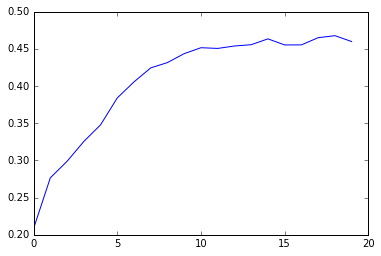

In [45]:
history = newModel.fit([ out, preprocess_input(X_train)], Y_train, batch_size=16, epochs=20, verbose=1)
plt.plot(history.history['categorical_accuracy'])

In [46]:
newModel.save('cnn_vgg19.h5')

In [47]:
# implementing subset accuracy

def accuracy_metric( y_pred, y_data ):
  
  # y_pred is list of list of floats, while y_data is one hot encoded genres
  accuracy = 0
  
  for i in range(len(y_pred)):
    
    pred_genres = y_pred[i].argsort()[-3:]                   # will return indices of top 3 predictions
    z_pred = np.zeros(len(genres_dict))
    z_pred[pred_genres[0]] =  1
    z_pred[pred_genres[1]] =  1
    z_pred[pred_genres[2]] =  1
    
    num = np.dot(z_pred, y_data[i])
    denum = np.logical_or(z_pred, y_data[i]).sum()
    accuracy += num / denum
    
  return accuracy / len(y_pred)

In [48]:
def accuracy_2(y_true, y_pred):
  # (y_pred intersection y_true)/(y_pred union y_true)
  accuracy = 0
  for i in range(len(y_pred)):
    pred = np.rint(y_pred[i])
    numerator = np.sum(pred * y_true[i])
    denominator = np.logical_or(pred, y_true[i]).sum()
    accuracy += numerator / denominator
    
  return accuracy / len(y_pred)

In [49]:
# now we need to see subset accuracy on test data

X_test = preprocess_input(X_test)
out2 =  model1.predict(X_test)
print(out2.shape)
features = newModel.predict([out2, X_test])
print(accuracy_2(Y_test, features))
print(accuracy_metric(features, Y_test))


(6319, 7, 7, 512)
0.23729681459543764
0.2961414554744161


In [50]:
print(features.shape)

(6319, 20)


In [51]:
# function to print poster with its true and predicted values

import random
from PIL import Image
from matplotlib.pyplot import imshow

% matplotlib inline

def test_sample(sample):
  
  plt.imshow(X_test[sample])
  
  genre_ind = list(genres_dict.keys())

  print('True Values :') 

  count = np.sum(Y_test[sample])
  true_genres = Y_test[sample].argsort()[-count:]
  l = []
  for j in range(count):
    l.append(genres_dict[genre_ind[true_genres[j]]])
  l.sort()
  print(l)
  
  print('Predicted Values')     
  prediction = features[sample] 
  pred_genres = prediction.argsort()[-3:]                   # will return indices of top 3 predictions
  
  
  l=[]
  l.append(genres_dict[genre_ind[pred_genres[0]]])
  l.append(genres_dict[genre_ind[pred_genres[1]]])
  l.append(genres_dict[genre_ind[pred_genres[2]]])
  l.sort()
  print(l)
  
  print('-' * 40)

True Values :
['Comedy', 'Mystery', 'Romance', 'Thriller']
Predicted Values
['Comedy', 'Drama', 'Romance']
----------------------------------------


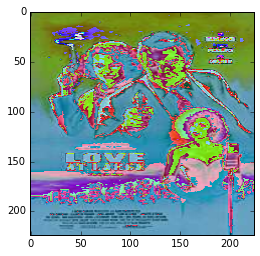

In [57]:
test_sample(40)

True Values :
['Action', 'Crime', 'Horror', 'Science Fiction', 'Thriller']
Predicted Values
['Action', 'Comedy', 'Drama']
----------------------------------------


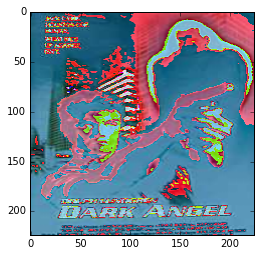

In [53]:
test_sample(20)

True Values :
['Action', 'Horror', 'Thriller']
Predicted Values
['Action', 'Science Fiction', 'Thriller']
----------------------------------------


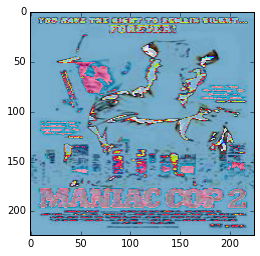

In [54]:
test_sample(150)

True Values :
['Comedy', 'Crime', 'Drama', 'Foreign']
Predicted Values
['Comedy', 'Drama', 'Romance']
----------------------------------------


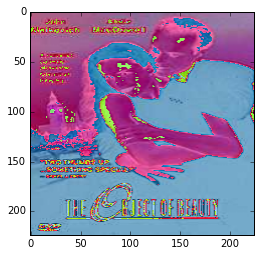

In [55]:
test_sample(200)

True Values :
['Comedy']
Predicted Values
['Comedy', 'Drama', 'Romance']
----------------------------------------


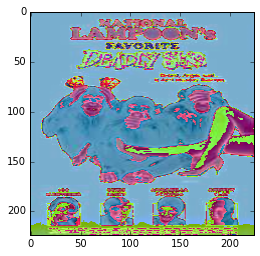

In [56]:
test_sample(1000)